In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

In [18]:
lagged_data = pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/processed/lagged_2012-2013-solar-electricity-data.csv")
lagged_data['datetime'] = pd.to_datetime(lagged_data['datetime'])

In [33]:
deltas = lagged_data[(lagged_data['Consumption Category']=="solar_generation") & (lagged_data['Customer']==3)].sort_values("datetime")['datetime'].diff()

gaps = deltas[deltas > timedelta(days=1)]


print(f'{len(gaps)} gaps with average gap duration: {gaps.mean()}')
for i, g in gaps.iteritems():
    gap_start = lagged_data['datetime'][i - 1]
    print(f'Start: {datetime.strftime(gap_start, "%Y-%m-%d")} | '
          f'Duration: {str(g.to_pytimedelta())}')



22 gaps with average gap duration: 15 days 05:57:16.363636
Start: 2012-02-07 | Duration: 25 days, 0:30:00
Start: 2012-03-07 | Duration: 23 days, 0:30:00
Start: 2012-04-07 | Duration: 25 days, 0:30:00
Start: 2012-05-07 | Duration: 24 days, 0:30:00
Start: 2012-06-07 | Duration: 25 days, 0:30:00
Start: 2012-07-07 | Duration: 24 days, 0:30:00
Start: 2012-08-07 | Duration: 6 days, 0:30:00
Start: 2012-09-07 | Duration: 6 days, 0:30:00
Start: 2012-10-07 | Duration: 6 days, 0:30:00
Start: 2012-11-07 | Duration: 6 days, 0:30:00
Start: 2012-12-07 | Duration: 6 days, 0:30:00
Start: 2013-01-13 | Duration: 6 days, 0:30:00
Start: 2013-02-13 | Duration: 6 days, 0:30:00
Start: 2013-03-13 | Duration: 6 days, 0:30:00
Start: 2013-04-13 | Duration: 6 days, 0:30:00
Start: 2013-05-13 | Duration: 6 days, 0:30:00
Start: 2013-06-13 | Duration: 6 days, 0:30:00
Start: 2013-08-01 | Duration: 25 days, 0:30:00
Start: 2013-09-01 | Duration: 25 days, 0:30:00
Start: 2013-10-01 | Duration: 24 days, 0:30:00
Start: 2013-

In [50]:
data = pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/processed/2012-2013-solar-electricity-data.csv")
data['datetime'] = pd.to_datetime(data['datetime'])
data['hour'] = data['datetime'].dt.strftime('%H:%M:%S')

data.head()

,Unnamed: 0,Customer,Generator Capacity,Postcode,Consumption Category,date,time,consumption,datetime,hour
0,0,1,3.78,2076,controlled_load_consumption,1/07/2012,0:30,1.250,2012-01-07 00:30:00,00:30:00
1,1,1,3.78,2076,general_electricity_consumption,1/07/2012,0:30,0.855,2012-01-07 00:30:00,00:30:00
2,2,1,3.78,2076,solar_generation,1/07/2012,0:30,0.000,2012-01-07 00:30:00,00:30:00
3,3,1,3.78,2076,controlled_load_consumption,2/07/2012,0:30,1.250,2012-02-07 00:30:00,00:30:00
4,4,1,3.78,2076,general_electricity_consumption,2/07/2012,0:30,0.309,2012-02-07 00:30:00,00:30:00


In [42]:
deltas = data[data['Consumption Category'] == "solar_generation"].sort_values("datetime")['datetime'].diff()
gaps = deltas[deltas > timedelta(days=1)]

print(f'{len(gaps)} gaps with average gap duration: {gaps.mean()}')
for i, g in gaps.iteritems():
    gap_start = data['datetime'][i - 1]
    print(f'Start: {datetime.strftime(gap_start, "%Y-%m-%d")} | '
          f'Duration: {str(g.to_pytimedelta())}')

22 gaps with average gap duration: 15 days 05:57:16.363636
Start: 2012-02-07 | Duration: 25 days, 0:30:00
Start: 2012-03-07 | Duration: 23 days, 0:30:00
Start: 2012-04-07 | Duration: 25 days, 0:30:00
Start: 2012-05-07 | Duration: 24 days, 0:30:00
Start: 2012-06-07 | Duration: 25 days, 0:30:00
Start: 2012-07-07 | Duration: 24 days, 0:30:00
Start: 2012-08-07 | Duration: 6 days, 0:30:00
Start: 2012-09-07 | Duration: 6 days, 0:30:00
Start: 2012-10-07 | Duration: 6 days, 0:30:00
Start: 2012-11-07 | Duration: 6 days, 0:30:00
Start: 2012-12-07 | Duration: 6 days, 0:30:00
Start: 2013-01-13 | Duration: 6 days, 0:30:00
Start: 2013-02-13 | Duration: 6 days, 0:30:00
Start: 2013-03-13 | Duration: 6 days, 0:30:00
Start: 2013-04-13 | Duration: 6 days, 0:30:00
Start: 2013-05-13 | Duration: 6 days, 0:30:00
Start: 2013-06-13 | Duration: 6 days, 0:30:00
Start: 2013-08-01 | Duration: 25 days, 0:30:00
Start: 2013-09-01 | Duration: 25 days, 0:30:00
Start: 2013-10-01 | Duration: 24 days, 0:30:00
Start: 2013-

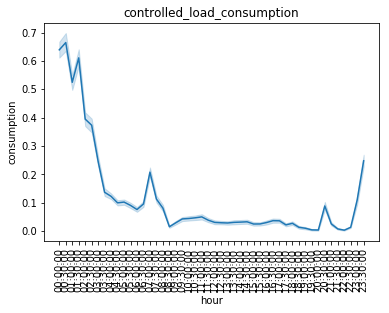

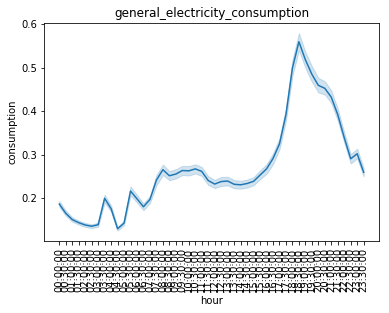

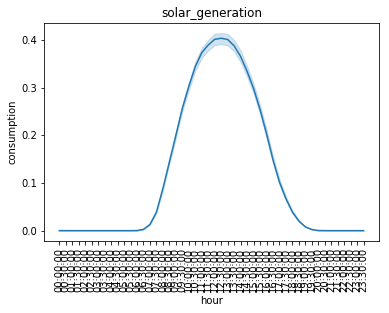

In [52]:
for i, grouped_data in data.groupby("Consumption Category"):
    sns.lineplot(data=grouped_data, x="hour", y="consumption")
    plt.xticks(rotation=90)
    plt.title(i)
    plt.show()
    plt.close()